# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [11]:
#PRE PROCESSING
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,668 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [12]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Specify Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

driver = webdriver.Chrome(options=options)

#Extracting the reviews from link
link = 'https://www.imdb.com/title/tt5296406/reviews/'
ta = []
ra = []
driver.get(link)
# html_content = driver.page_source
# print(html_content)
for num in range(4):
  load_more_button = driver.find_element(By.XPATH, "//span[text()='25 more']")
  driver.execute_script("arguments[0].scrollIntoView(true);", load_more_button)
  time.sleep(2)  # Allow time for any overlays to move
  load_more_button.click()
  #driver.find_element(By.XPATH, "//span[text()='25 more']").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "ipc-title__text")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "ipc-html-content-inner-div")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      ta.append((ele.text).replace('\n',''))
      ra.append(sub_ele.text)
df = pd.DataFrame(list(zip(ta, ra)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 103


,Title,Review
0,User reviews,I enjoyed the first two seasons of Designated ...
1,Started out good ended bad.,Season One and Two were fantastic: Interesting...
2,0 Stars for Season Three; 10 Stars each for Se...,"Started off brilliant, season one is fantastic..."
3,"Seasons 1 and 2 - 9 stars. Season 3,- 0 stars.","I really liked ""Designated Survivor"" for the f..."
4,Third season is a dud,I've liked this show even though it's a little...
...,...,...
98,WW2,The show started with a great and unique conce...
99,Great show!!,Great series - Good acting - Plots are interes...
100,waste of time,Great show that slacked at the end of season 2...
101,Enjoyable to watch but not very realistic,Great show first 2 seasons. Evidently Netflix ...


In [13]:
# Save DataFrame to CSV
print("Reviews saved to file")
df.to_csv('Designated_survivor.csv', index=False)

Reviews saved to file


In [14]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [19]:
#Converting to Lower Case
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removal of Punctuation
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

#Removal of Special Characters
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

#Removal of Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Spelling Correction
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

#Tokenization
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('reviews.csv',index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#1.1
import nltk
import itertools
from collections import Counter
def tokenize_text(text):
    return nltk.word_tokenize(text.lower())
tk_reviews = df['Review'].apply(tokenize_text)
# Generate trigrams when N=3
trigrams = list(itertools.chain.from_iterable(nltk.trigrams(tokens) for tokens in tk_reviews))
# Count the frequency of each trigram
tf = Counter(trigrams)
for trigram, freq in tf.items():
    print(f"{trigram}: {freq}")

('i', 'enjoyed', 'the'): 2
('enjoyed', 'the', 'first'): 2
('the', 'first', 'two'): 18
('first', 'two', 'seasons'): 19
('two', 'seasons', 'of'): 2
('seasons', 'of', 'designated'): 1
('of', 'designated', 'survivor'): 1
('designated', 'survivor', 'it'): 1
('survivor', 'it', 'was'): 1
('it', 'was', 'entertaining'): 1
('was', 'entertaining', 'and'): 1
('entertaining', 'and', 'kept'): 1
('and', 'kept', 'your'): 1
('kept', 'your', 'interest'): 1
('your', 'interest', '.'): 1
('interest', '.', 'if'): 1
('.', 'if', 'your'): 1
('if', 'your', 'a'): 1
('your', 'a', '24'): 1
('a', '24', 'fan'): 1
('24', 'fan', 'you'): 1
('fan', 'you', 'will'): 1
('you', 'will', 'enjoy'): 1
('will', 'enjoy', 'the'): 1
('enjoy', 'the', 'first'): 1
('two', 'seasons', 'it'): 1
('seasons', 'it', "'s"): 1
('it', "'s", 'basically'): 2
("'s", 'basically', 'if'): 1
('basically', 'if', 'jack'): 1
('if', 'jack', 'bauer'): 3
('jack', 'bauer', 'became'): 1
('bauer', 'became', 'president'): 1
('became', 'president', '.'): 1
('pre

In [21]:
#2. probabilities for all the bigrams in the dataset
from collections import Counter
flat_tokens = list(itertools.chain.from_iterable(tk_reviews))
# Calculate the frequency of all bigrams
bg = nltk.bigrams(flat_tokens)
frequency_dist = nltk.FreqDist(bg)
bg_dict = dict(frequency_dist)
word_counts = Counter(flat_tokens)
# Print the probability of the 2nd word given the 1st word in each bigram
for bigram, freq in bg_dict.items():
    word1, word2 = bigram
    if word_counts[word1] != 0:
        probability = freq / word_counts[word1]
        print(f"{bigram}: {probability}")
    else:
        print(f"Warning: Count of {word1} is zero.")

('i', 'enjoyed'): 0.013636363636363636
('enjoyed', 'the'): 0.2
('the', 'first'): 0.06340579710144928
('first', 'two'): 0.4444444444444444
('two', 'seasons'): 0.5428571428571428
('seasons', 'of'): 0.0625
('of', 'designated'): 0.004878048780487805
('designated', 'survivor'): 0.9
('survivor', 'it'): 0.047619047619047616
('it', 'was'): 0.08121827411167512
('was', 'entertaining'): 0.0125
('entertaining', 'and'): 0.3333333333333333
('and', 'kept'): 0.0035087719298245615
('kept', 'your'): 0.2
('your', 'interest'): 0.08333333333333333
('interest', '.'): 0.3333333333333333
('.', 'if'): 0.02301255230125523
('if', 'your'): 0.03125
('your', 'a'): 0.08333333333333333
('a', '24'): 0.004219409282700422
('24', 'fan'): 0.07142857142857142
('fan', 'you'): 0.5
('you', 'will'): 0.022222222222222223
('will', 'enjoy'): 0.05263157894736842
('enjoy', 'the'): 0.5714285714285714
('seasons', 'it'): 0.03125
('it', "'s"): 0.18274111675126903
("'s", 'basically'): 0.025974025974025976
('basically', 'if'): 0.5
('if',

In [22]:
#3 Noun Phrases and relative probabilities of each review in terms of other reviews
import nltk
from nltk import pos_tag, RegexpParser
from collections import Counter
import pandas as pd

tr = [nltk.word_tokenize(review.lower()) for review in df['Review']]
# Extract noun phrases using part-of-speech tagging
n_phrases = []
for review_tokens in tr:
    if review_tokens:
        t_tokens = pos_tag(review_tokens)
        g = r'NP: {<DT>?<JJ>*<NN>}'
        chunk_parser = RegexpParser(g)
        tree = chunk_parser.parse(t_tokens)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                n_phrase = ' '.join(word for word, tag in subtree.leaves())
                n_phrases.append(n_phrase)
# frequency of each noun phrase
npf = Counter(n_phrases)
# Creating a table to store relative frequencies of noun phrases for each review
npt = {}
for i, review in enumerate(df['Review']):
    tokenized_review = nltk.word_tokenize(review.lower())
    review_n_phrases = [n_phrase for n_phrase in n_phrases if n_phrase in tokenized_review]
    review_freq = Counter(review_n_phrases)
    r_freq = {n_phrase: review_freq[n_phrase] / npf[n_phrase] for n_phrase in review_freq}
    npt[f"Review {i+1}"] = r_freq
np_df = pd.DataFrame(npt).fillna(0)
np_df

,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,...,Review 94,Review 95,Review 96,Review 97,Review 98,Review 99,Review 100,Review 101,Review 102,Review 103
i,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
interest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
president,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
season,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
help,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
persona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
terrorism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [23]:
import math
import pandas as pd
s = df["Review"].values.tolist()
words = set([word for sentence in s for word in sentence.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count = 1
def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0
for sentence in s:
    tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    count += 1
tf_idf_df

<ipython-input-23-7d11b6b1dac5>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-23-7d11b6b1dac5>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-23-7d11b6b1dac5>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review94,Review95,Review96,Review97,Review98,Review99,Review100,Review101,Review102,Review103
0,done!The,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,etc.,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,stay,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Survivor"".",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,stance,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,"field,",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,growing,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,attackers,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,new,0.0,0.0,0.0,0.025392,0.0,0.0,0.0,0.033,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

query = "I am interested in learning about natural language processing techniques and their applications in data and knowledge retrieval. I want to understand how these techniques can be used to analyze text directly, rather than just titles and abstracts. Additionally, I'm curious about the importance of rigor in these approaches."
query_tokens = word_tokenize(query)
stop = set(stopwords.words('english'))
query_words = {word for word in query_tokens if not word in stop}
# Function to calculate the cosine similarity
def cosine_similarity(X, Y):
    intersection = len(X.intersection(Y))
    cosine_sim = intersection / ((len(X) * len(Y)) ** 0.5)
    return cosine_sim
reviews_df = pd.read_csv('Designated_survivor.csv')
# Calculate cosine similarity with each review
c_similarities = []
for review in reviews_df['Review']:
    if isinstance(review, str):
        review_tokens = word_tokenize(review)
        review_words = {word for word in review_tokens if not word in stop}
        c_similarities.append(cosine_similarity(query_words, review_words))
    else:
        c_similarities.append(0)
# Add cosine similarity to DataFrame
reviews_df['Cosine Similarity'] = c_similarities
rank_review_df = reviews_df.sort_values(by='Cosine Similarity', ascending=False)
rank_review_df['Rank'] = np.arange(1, len(rank_review_df) + 1)
ranked_rd = rank_review_df[['Review', 'Cosine Similarity', 'Rank']]
ranked_reviewsdataframe = pd.DataFrame(ranked_rd)
print("Ranked Reviews based on Similarity to the Query:")
ranked_reviewsdataframe

Ranked Reviews based on Similarity to the Query:


,Review,Cosine Similarity,Rank
69,This used to be a show we enjoyed and were hap...,0.183942,1
91,I have thoroughly enjoyed binge watching the f...,0.173702,2
36,"Honestly, after watching House of Cards I was ...",0.164488,3
75,Season 3 sucks. I couldn't even finish it. I d...,0.157243,4
64,"I really like first season. However, The secon...",0.151523,5
...,...,...,...
99,Great series - Good acting - Plots are interes...,0.000000,99
28,Why does Kiefer Sutherland always whisper? Ver...,0.000000,100
66,Season 1 - gripping Season 2 - far fetched Sea...,0.000000,101
41,Season 3 changed the series completely and des...,0.000000,102


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [25]:

!pip install gensim

In [26]:
import gensim
from gensim.models import Word2Vec
import pandas as pd

# Load data from CSV from previous assignment
data_url = '/content/Designated_survivor.csv'
df = pd.read_csv(data_url)

# Preprocess the data
corpus = []
for text in df['Review']:
    tokens = text.split()  # Simple tokenization by splitting on whitespace
    corpus.append(tokens)

# Train the Word2Vec model with 300-dimension vectors
model = Word2Vec(corpus, min_count=1, vector_size=300, window=5, workers=4)
print("Word2Vec model training is completed.")

Word2Vec model training is completed.


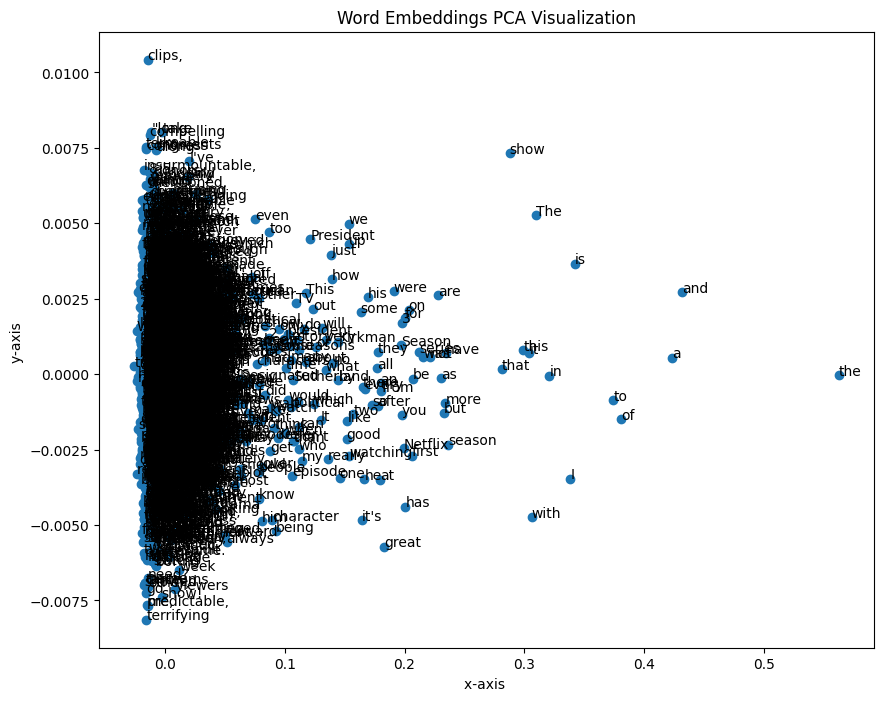

In [27]:
#(2) Visualize the word embedding model you created.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
word_vectors = model.wv
vocab = list(word_vectors.key_to_index)
X = word_vectors[vocab]

# Fitting a 2D PCA model to the word vectors for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Creating the plot of the 2D PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Words on the scatter plot
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.xlabel('x-axis ')
plt.ylabel('y-axis ')
plt.title('Word Embeddings PCA Visualization')
plt.show()

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity between two words
def get_cosine_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1].reshape(1, -1)
        vec2 = model.wv[word2].reshape(1, -1)
        similarity = cosine_similarity(vec1, vec2)[0][0]
        return similarity
    else:
        return f"One or both words ('{word1}', '{word2}') are not in vocabulary."

# Example word pairs
word_pairs = [
    ("terrorist", "president"),
    ("political", "how"),
    ("survivor", "disaster"),
    ("Netflix", "attack"),
    ("justice", "law"),
]

# Compute and print cosine similarities
for word1, word2 in word_pairs:
    similarity = get_cosine_similarity(word1, word2, model)
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}" if isinstance(similarity, float) else similarity)

0.46527928
0.93806905
One or both words ('survivor', 'disaster') are not in vocabulary.
0.029202284
One or both words ('justice', 'law') are not in vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Deepthi0027/DeepthiReddy_INFO5731_SPRING2025/blob/main/reviews%20doc.csv



1. Choosing the Dataset's NLP Task:
 The NLP task for the IMDB movie review dataset is sentiment analysis.  This is exactly what the document says it wants to accomplish: "The goal is to manually label each review as positive, negative, or neutral and create a structured dataset that can be used for training and evaluating a sentiment analysis model."
 For this dataset, sentiment analysis is perfect because:

 Opinions and feelings are naturally expressed in movie reviews.
 There are obvious indications of both positive and negative views in the text.

 2. Labeling Schema Explanation
Based on the document you shared, you've implemented a three-class sentiment labeling system:

Positive (1): Assigned to reviews that express satisfaction, excitement, or praise about the movie.
Example: "This movie was absolutely incredible! The performances were brilliant."


Negative (0): Assigned to reviews that express disappointment, criticism, or poor opinions about the movie.
Example: "The acting was horrible, and the plot made no sense. A complete waste of time."


Neutral (2): Assigned to reviews that don't strongly indicate either positive or negative sentiment or contain balanced opinions.
Example: "The movie had some great moments but was also slow in parts."

document_id: An individual identification number for every review
 clean_text:  The preprocessed sentence from the review
 text:  The given number label (zero, one, or two).

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
It was a bit challenging to solve some question. Needed more time to be given .